In [2]:
import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)
import matplotlib.pyplot as plt
import tensorflow as tf
from sklearn.model_selection import train_test_split
from sklearn.compose import make_column_transformer
from sklearn.preprocessing import MinMaxScaler, OneHotEncoder

# Import data

In [3]:
insurance_df = pd.read_csv("data/insurance.csv")

insurance_df

,age,sex,bmi,children,smoker,region,charges
0,19,female,27.900,0,yes,southwest,16884.92400
1,18,male,33.770,1,no,southeast,1725.55230
2,28,male,33.000,3,no,southeast,4449.46200
3,33,male,22.705,0,no,northwest,21984.47061
4,32,male,28.880,0,no,northwest,3866.85520
...,...,...,...,...,...,...,...
1333,50,male,30.970,3,no,northwest,10600.54830
1334,18,female,31.920,0,no,northeast,2205.98080
1335,18,female,36.850,0,no,southeast,1629.83350
1336,21,female,25.800,0,no,southwest,2007.94500


# Split, Normalize, One-Hot Encode

In [4]:
# Global tf seed
tf.random.set_seed(42)

# Create Labels
features = insurance_df.drop(columns=["charges"])
labels = insurance_df["charges"]

# 20% test split
X_train, X_test, y_train, y_test = train_test_split(features, labels, test_size=0.2, random_state=42)

# One-hot encoder and normalize
ct = make_column_transformer(
    (MinMaxScaler(), ["age", "bmi", "children"]),
    (OneHotEncoder(handle_unknown="ignore"), ["sex", "smoker", "region"])
)

ct.fit(X_train)  # only fit to training data to prevent data leakage

X_train = ct.transform(X_train)
X_test = ct.transform(X_test)

# Create model

In [6]:
# 1. Create model
insurance_model_01 = tf.keras.Sequential([
    tf.keras.layers.Input(shape=(11,)),
    tf.keras.layers.Dense(10),
    tf.keras.layers.Dense(1),
])

# 2. Compile model
insurance_model_01.compile(
    loss=tf.keras.losses.mae,
    optimizer=tf.keras.optimizers.Adam(),
    metrics=["mae"],
)

# 3. Fit the model
insurance_model_01_history = insurance_model_01.fit(X_train, y_train, epochs=100)

Epoch 1/100
34/34 ━━━━━━━━━━━━━━━━━━━━ 1s 6ms/step - loss: 13296.7959 - mae: 13298.9004  
Epoch 2/100
34/34 ━━━━━━━━━━━━━━━━━━━━ 0s 856us/step - loss: 13295.8809 - mae: 13297.9854
Epoch 3/100
34/34 ━━━━━━━━━━━━━━━━━━━━ 0s 717us/step - loss: 13294.9023 - mae: 13297.0068
Epoch 4/100
34/34 ━━━━━━━━━━━━━━━━━━━━ 0s 727us/step - loss: 13293.7959 - mae: 13295.9004
Epoch 5/100
34/34 ━━━━━━━━━━━━━━━━━━━━ 0s 711us/step - loss: 13292.5146 - mae: 13294.6191
Epoch 6/100
34/34 ━━━━━━━━━━━━━━━━━━━━ 0s 716us/step - loss: 13291.0088 - mae: 13293.1143
Epoch 7/100
34/34 ━━━━━━━━━━━━━━━━━━━━ 0s 735us/step - loss: 13289.2627 - mae: 13291.3682
Epoch 8/100
34/34 ━━━━━━━━━━━━━━━━━━━━ 0s 740us/step - loss: 13287.2725 - mae: 13289.3770
Epoch 9/100
34/34 ━━━━━━━━━━━━━━━━━━━━ 0s 714us/step - loss: 13285.0322 - mae: 13287.1377
Epoch 10/100
34/34 ━━━━━━━━━━━━━━━━━━━━ 0s 738us/step - loss: 13282.5273 - mae: 13284.6328
Epoch 11/100
34/34 ━━━━━━━━━━━━━━━━━━━━ 0s 727us/step - loss: 13279.7500 - mae: 13281.8555
Epoch 12

In [28]:
def visualize_model_loss(history):
    # Plotting the training loss
    plt.figure(figsize=(10,6))
    plt.plot(history.history['loss'], label='Training Loss')
    plt.title('Model Loss')
    plt.ylabel('Error')
    plt.xlabel('Epoch')
    plt.legend(loc='upper right')
    plt.show()

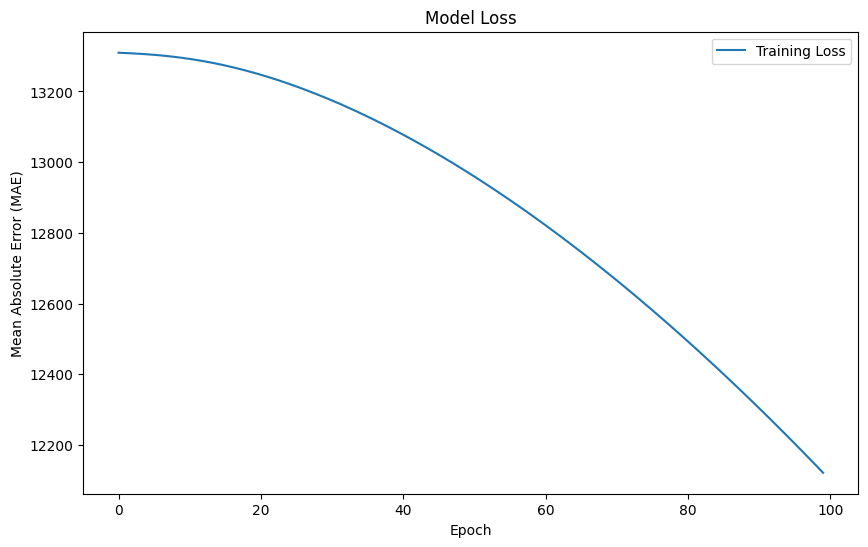

In [8]:
visualize_model_loss(insurance_model_01_history)

In [9]:
def make_predictions(model):
    # Make predictions on the test data
    predictions = model.predict(X_test)

    # Iterate through the test data
    for i in range(10):
        print(f"Actual Value: {y_test.iloc[i]:.2f} | Predicted Value: {predictions[i][0]:.2f}")

In [10]:
make_predictions(insurance_model_01)

9/9 ━━━━━━━━━━━━━━━━━━━━ 0s 7ms/step
Actual Value: 9095.07 | Predicted Value: 1235.31
Actual Value: 5272.18 | Predicted Value: 1131.83
Actual Value: 29330.98 | Predicted Value: 1250.44
Actual Value: 9301.89 | Predicted Value: 1289.11
Actual Value: 33750.29 | Predicted Value: 1036.34
Actual Value: 4536.26 | Predicted Value: 1237.99
Actual Value: 2117.34 | Predicted Value: 996.05
Actual Value: 14210.54 | Predicted Value: 1317.62
Actual Value: 3732.63 | Predicted Value: 1002.81
Actual Value: 10264.44 | Predicted Value: 1323.18


# Experiment!

In [11]:
# Train for more epochs

# 1. Create model
insurance_model_02 = tf.keras.Sequential([
    tf.keras.layers.Input(shape=(11,)),
    tf.keras.layers.Dense(10),
    tf.keras.layers.Dense(1),
])

# 2. Compile model
insurance_model_02.compile(
    optimizer=tf.keras.optimizers.Adam(),
    loss=tf.keras.losses.mae,
    metrics=["mae"],
)

# 3. Fit model
insurance_model_02_history = insurance_model_02.fit(X_train, y_train, epochs=1000, verbose=1)

Epoch 1/1000
34/34 ━━━━━━━━━━━━━━━━━━━━ 1s 7ms/step - loss: 13296.4453 - mae: 13298.5498  
Epoch 2/1000
34/34 ━━━━━━━━━━━━━━━━━━━━ 0s 750us/step - loss: 13295.5977 - mae: 13297.7012
Epoch 3/1000
34/34 ━━━━━━━━━━━━━━━━━━━━ 0s 736us/step - loss: 13294.6826 - mae: 13296.7871
Epoch 4/1000
34/34 ━━━━━━━━━━━━━━━━━━━━ 0s 748us/step - loss: 13293.6533 - mae: 13295.7578
Epoch 5/1000
34/34 ━━━━━━━━━━━━━━━━━━━━ 0s 784us/step - loss: 13292.4561 - mae: 13294.5605
Epoch 6/1000
34/34 ━━━━━━━━━━━━━━━━━━━━ 0s 797us/step - loss: 13291.0498 - mae: 13293.1543
Epoch 7/1000
34/34 ━━━━━━━━━━━━━━━━━━━━ 0s 782us/step - loss: 13289.4004 - mae: 13291.5049
Epoch 8/1000
34/34 ━━━━━━━━━━━━━━━━━━━━ 0s 767us/step - loss: 13287.4893 - mae: 13289.5938
Epoch 9/1000
34/34 ━━━━━━━━━━━━━━━━━━━━ 0s 701us/step - loss: 13285.3018 - mae: 13287.4062
Epoch 10/1000
34/34 ━━━━━━━━━━━━━━━━━━━━ 0s 748us/step - loss: 13282.8232 - mae: 13284.9287
Epoch 11/1000
34/34 ━━━━━━━━━━━━━━━━━━━━ 0s 792us/step - loss: 13280.0479 - mae: 13282.15

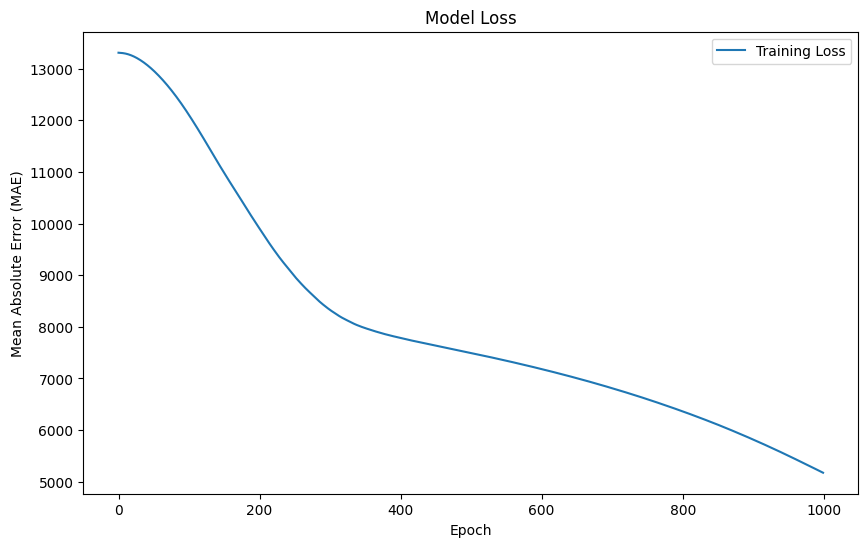

9/9 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step 
Actual Value: 9095.07 | Predicted Value: 9788.73
Actual Value: 5272.18 | Predicted Value: 7458.26
Actual Value: 29330.98 | Predicted Value: 21590.37
Actual Value: 9301.89 | Predicted Value: 9557.15
Actual Value: 33750.29 | Predicted Value: 14879.75
Actual Value: 4536.26 | Predicted Value: 7530.64
Actual Value: 2117.34 | Predicted Value: 4406.53
Actual Value: 14210.54 | Predicted Value: 12058.92
Actual Value: 3732.63 | Predicted Value: 6056.03
Actual Value: 10264.44 | Predicted Value: 10194.61


In [15]:
# Evaluate
visualize_model_loss(insurance_model_02_history)
make_predictions(insurance_model_02)

In [24]:
# Add early stop 
early_stopping = tf.keras.callbacks.EarlyStopping(monitor="loss", 
                               patience=20, 
                               restore_best_weights=True, 
                               verbose=1)

In [25]:
# Add more layers and early stop 

# 1. Create model
insurance_model_03 = tf.keras.Sequential([
    tf.keras.layers.Input(shape=(11,)),
    tf.keras.layers.Dense(50),
    tf.keras.layers.Dense(50),
    tf.keras.layers.Dense(50),
    tf.keras.layers.Dense(50),
    tf.keras.layers.Dense(50),
    tf.keras.layers.Dense(1),
])

# 2. Compile model
insurance_model_03.compile(
    optimizer=tf.keras.optimizers.Adam(),
    loss=tf.keras.losses.mae,
    metrics=["mae"],
)

# 3. Fit model
insurance_model_03_history = insurance_model_03.fit(
    X_train, 
    y_train, 
    epochs=1000, 
    verbose=1, 
    callbacks=[early_stopping]
)

Epoch 1/1000
34/34 ━━━━━━━━━━━━━━━━━━━━ 2s 12ms/step - loss: 13289.3779 - mae: 13291.5596
Epoch 2/1000
34/34 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step - loss: 12786.2715 - mae: 12790.5986 
Epoch 3/1000
34/34 ━━━━━━━━━━━━━━━━━━━━ 0s 967us/step - loss: 8469.1816 - mae: 8469.9873
Epoch 4/1000
34/34 ━━━━━━━━━━━━━━━━━━━━ 0s 978us/step - loss: 7759.9688 - mae: 7760.4087
Epoch 5/1000
34/34 ━━━━━━━━━━━━━━━━━━━━ 0s 995us/step - loss: 7206.6045 - mae: 7207.1084
Epoch 6/1000
34/34 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step - loss: 6353.2515 - mae: 6354.1987 
Epoch 7/1000
34/34 ━━━━━━━━━━━━━━━━━━━━ 0s 993us/step - loss: 4568.9780 - mae: 4570.4727
Epoch 8/1000
34/34 ━━━━━━━━━━━━━━━━━━━━ 0s 999us/step - loss: 3730.7959 - mae: 3731.9207
Epoch 9/1000
34/34 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step - loss: 3661.7710 - mae: 3663.1582 
Epoch 10/1000
34/34 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step - loss: 3648.3489 - mae: 3649.8374 
Epoch 11/1000
34/34 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step - loss: 3641.3860 - mae: 3643.0022 
Epoch 12/1000
34/34 ━

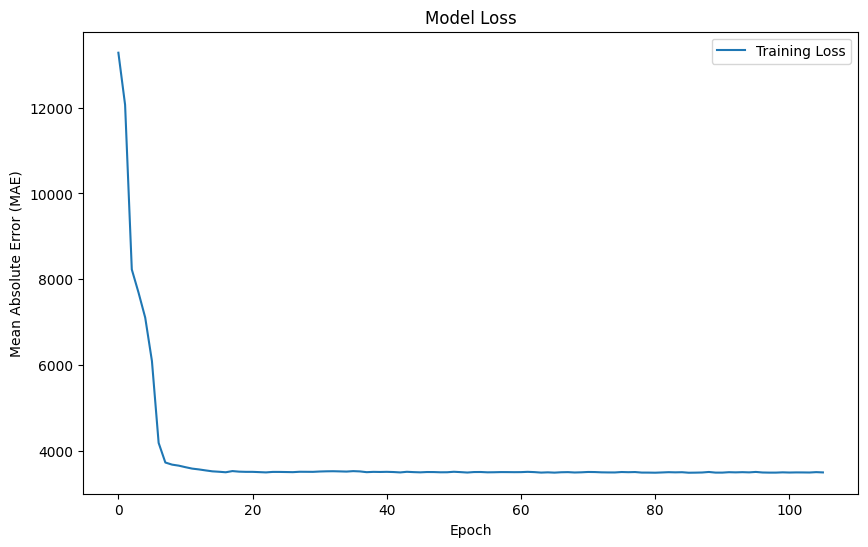

9/9 ━━━━━━━━━━━━━━━━━━━━ 0s 10ms/step
Actual Value: 9095.07 | Predicted Value: 9092.35
Actual Value: 5272.18 | Predicted Value: 6018.24
Actual Value: 29330.98 | Predicted Value: 43888.65
Actual Value: 9301.89 | Predicted Value: 9223.34
Actual Value: 33750.29 | Predicted Value: 32035.01
Actual Value: 4536.26 | Predicted Value: 5779.73
Actual Value: 2117.34 | Predicted Value: 1201.30
Actual Value: 14210.54 | Predicted Value: 13277.76
Actual Value: 3732.63 | Predicted Value: 3407.57
Actual Value: 10264.44 | Predicted Value: 10160.08


In [26]:
# Evaluate
visualize_model_loss(insurance_model_03_history)
make_predictions(insurance_model_03)

In [32]:
# Change to MSE

# 1. Create model
insurance_model_04 = tf.keras.Sequential([
    tf.keras.layers.Input(shape=(11,)),
    tf.keras.layers.Dense(50),
    tf.keras.layers.Dense(50),
    tf.keras.layers.Dense(50),
    tf.keras.layers.Dense(50),
    tf.keras.layers.Dense(50),
    tf.keras.layers.Dense(1),
])

# 2. Compile model
insurance_model_04.compile(
    optimizer=tf.keras.optimizers.Adam(),
    loss=tf.keras.losses.mse,
    metrics=["mae", "mse"],
)

# 3. Fit model
insurance_model_04_history = insurance_model_04.fit(
    X_train, 
    y_train, 
    epochs=1000, 
    verbose=1, 
    callbacks=[early_stopping]
)

Epoch 1/1000
34/34 ━━━━━━━━━━━━━━━━━━━━ 2s 11ms/step - loss: 318256064.0000 - mae: 13292.5938 - mse: 318274208.0000
Epoch 2/1000
34/34 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step - loss: 306890752.0000 - mae: 12859.3145 - mse: 306953760.0000 
Epoch 3/1000
34/34 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step - loss: 173745776.0000 - mae: 8815.7070 - mse: 173747312.0000 
Epoch 4/1000
34/34 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step - loss: 117502000.0000 - mae: 8284.2705 - mse: 117493584.0000 
Epoch 5/1000
34/34 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step - loss: 97546864.0000 - mae: 7821.2051 - mse: 97548096.0000 
Epoch 6/1000
34/34 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step - loss: 75860720.0000 - mae: 6968.0635 - mse: 75874984.0000 
Epoch 7/1000
34/34 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step - loss: 53126544.0000 - mae: 5882.9009 - mse: 53151468.0000 
Epoch 8/1000
34/34 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step - loss: 40763288.0000 - mae: 4681.6904 - mse: 40789420.0000 
Epoch 9/1000
34/34 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step - loss: 39376176.0000 - mae: 4226.

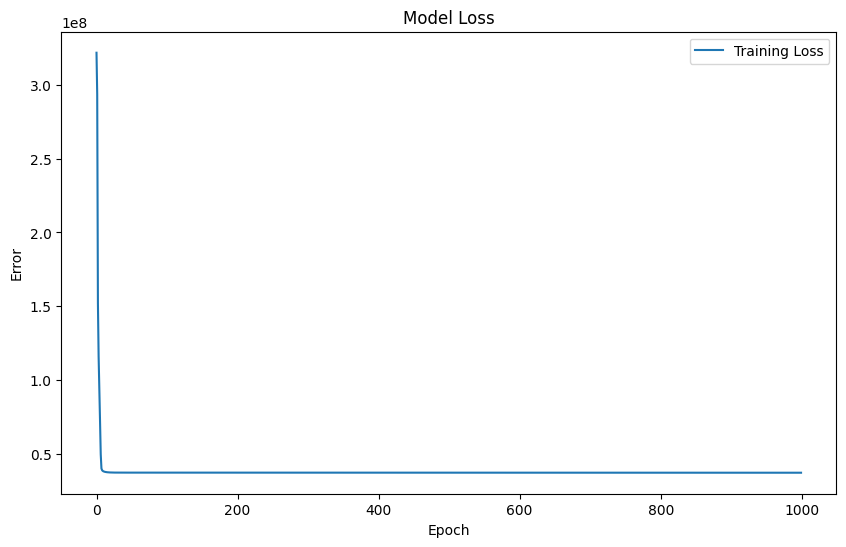

9/9 ━━━━━━━━━━━━━━━━━━━━ 0s 12ms/step
Actual Value: 9095.07 | Predicted Value: 9279.04
Actual Value: 5272.18 | Predicted Value: 7325.25
Actual Value: 29330.98 | Predicted Value: 37620.03
Actual Value: 9301.89 | Predicted Value: 9833.37
Actual Value: 33750.29 | Predicted Value: 27462.52
Actual Value: 4536.26 | Predicted Value: 11062.64
Actual Value: 2117.34 | Predicted Value: 346.62
Actual Value: 14210.54 | Predicted Value: 17258.28
Actual Value: 3732.63 | Predicted Value: 1252.13
Actual Value: 10264.44 | Predicted Value: 11609.73


In [33]:
# Evaluate
visualize_model_loss(insurance_model_04_history)
make_predictions(insurance_model_04)

In [36]:
# Lower LR

# 1. Create model
insurance_model_05 = tf.keras.Sequential([
    tf.keras.layers.Input(shape=(11,)),
    tf.keras.layers.Dense(50),
    tf.keras.layers.Dense(50),
    tf.keras.layers.Dense(50),
    tf.keras.layers.Dense(50),
    tf.keras.layers.Dense(50),
    tf.keras.layers.Dense(1),
])

# 2. Compile model
insurance_model_05.compile(
    optimizer=tf.keras.optimizers.Adam(learning_rate=.0001),
    loss=tf.keras.losses.mse,
    metrics=["mae", "mse"],
)

# 3. Fit model
insurance_model_05_history = insurance_model_05.fit(
    X_train, 
    y_train, 
    epochs=1000, 
    verbose=1, 
    callbacks=[early_stopping]
)

Epoch 1/1000
34/34 ━━━━━━━━━━━━━━━━━━━━ 2s 10ms/step - loss: 318397248.0000 - mae: 13297.8037 - mse: 318413952.0000
Epoch 2/1000
34/34 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step - loss: 318346368.0000 - mae: 13295.9912 - mse: 318363104.0000 
Epoch 3/1000
34/34 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step - loss: 318253056.0000 - mae: 13292.6436 - mse: 318269792.0000 
Epoch 4/1000
34/34 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step - loss: 318059264.0000 - mae: 13285.6436 - mse: 318076064.0000 
Epoch 5/1000
34/34 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step - loss: 317644544.0000 - mae: 13270.6113 - mse: 317661472.0000 
Epoch 6/1000
34/34 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step - loss: 316760640.0000 - mae: 13238.4883 - mse: 316777824.0000 
Epoch 7/1000
34/34 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step - loss: 314947360.0000 - mae: 13172.3252 - mse: 314964928.0000 
Epoch 8/1000
34/34 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step - loss: 311437760.0000 - mae: 13043.2314 - mse: 311455968.0000 
Epoch 9/1000
34/34 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step - loss: 305068064.00

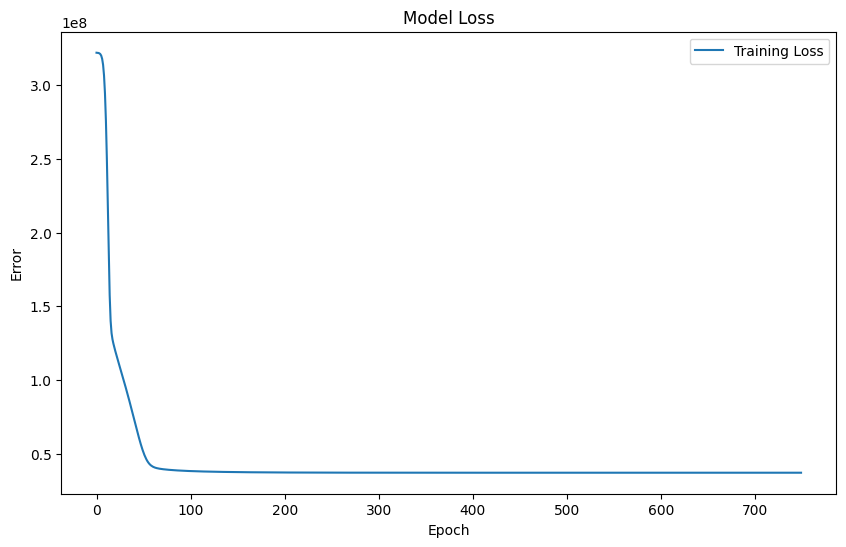

9/9 ━━━━━━━━━━━━━━━━━━━━ 0s 14ms/step
Actual Value: 9095.07 | Predicted Value: 8996.39
Actual Value: 5272.18 | Predicted Value: 7021.31
Actual Value: 29330.98 | Predicted Value: 36964.59
Actual Value: 9301.89 | Predicted Value: 9535.33
Actual Value: 33750.29 | Predicted Value: 27001.59
Actual Value: 4536.26 | Predicted Value: 10768.62
Actual Value: 2117.34 | Predicted Value: 142.11
Actual Value: 14210.54 | Predicted Value: 16853.49
Actual Value: 3732.63 | Predicted Value: 1082.21
Actual Value: 10264.44 | Predicted Value: 11286.88


In [37]:
# Evaluate
visualize_model_loss(insurance_model_05_history)
make_predictions(insurance_model_05)

In [38]:
# Even Lower LR

# 1. Create model
insurance_model_06 = tf.keras.Sequential([
    tf.keras.layers.Input(shape=(11,)),
    tf.keras.layers.Dense(50),
    tf.keras.layers.Dense(50),
    tf.keras.layers.Dense(50),
    tf.keras.layers.Dense(50),
    tf.keras.layers.Dense(50),
    tf.keras.layers.Dense(1),
])

# 2. Compile model
insurance_model_06.compile(
    optimizer=tf.keras.optimizers.Adam(learning_rate=.00001),
    loss=tf.keras.losses.mse,
    metrics=["mae", "mse"],
)

# 3. Fit model
insurance_model_06_history = insurance_model_06.fit(
    X_train, 
    y_train, 
    epochs=1000, 
    verbose=1, 
    callbacks=[early_stopping]
)

Epoch 1/1000
34/34 ━━━━━━━━━━━━━━━━━━━━ 2s 11ms/step - loss: 318418208.0000 - mae: 13298.6299 - mse: 318434880.0000
Epoch 2/1000
34/34 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - loss: 318415008.0000 - mae: 13298.5049 - mse: 318431680.0000 
Epoch 3/1000
34/34 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step - loss: 318411776.0000 - mae: 13298.3789 - mse: 318428480.0000 
Epoch 4/1000
34/34 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step - loss: 318408480.0000 - mae: 13298.2510 - mse: 318425152.0000 
Epoch 5/1000
34/34 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step - loss: 318405056.0000 - mae: 13298.1172 - mse: 318421728.0000 
Epoch 6/1000
34/34 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step - loss: 318401504.0000 - mae: 13297.9785 - mse: 318418176.0000 
Epoch 7/1000
34/34 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step - loss: 318397728.0000 - mae: 13297.8330 - mse: 318414432.0000 
Epoch 8/1000
34/34 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step - loss: 318393760.0000 - mae: 13297.6787 - mse: 318410464.0000 
Epoch 9/1000
34/34 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step - loss: 318389568.00

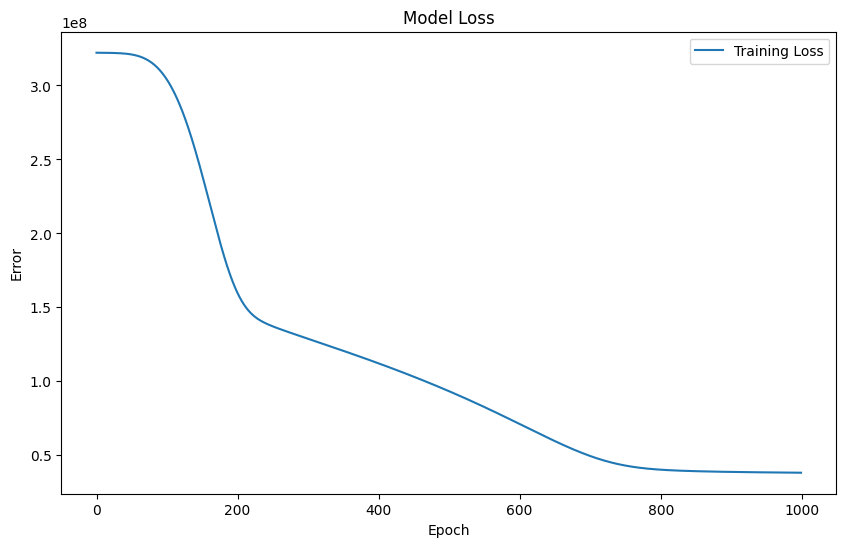

9/9 ━━━━━━━━━━━━━━━━━━━━ 0s 10ms/step
Actual Value: 9095.07 | Predicted Value: 9450.17
Actual Value: 5272.18 | Predicted Value: 6865.79
Actual Value: 29330.98 | Predicted Value: 36693.43
Actual Value: 9301.89 | Predicted Value: 10188.36
Actual Value: 33750.29 | Predicted Value: 27368.28
Actual Value: 4536.26 | Predicted Value: 8918.46
Actual Value: 2117.34 | Predicted Value: 1739.20
Actual Value: 14210.54 | Predicted Value: 14665.41
Actual Value: 3732.63 | Predicted Value: 3158.76
Actual Value: 10264.44 | Predicted Value: 11362.77


In [39]:
# Evaluate
visualize_model_loss(insurance_model_06_history)
make_predictions(insurance_model_06)

In [41]:
# Arbitrarily large epochs

# 1. Create model
insurance_model_07 = tf.keras.Sequential([
    tf.keras.layers.Input(shape=(11,)),
    tf.keras.layers.Dense(50),
    tf.keras.layers.Dense(50),
    tf.keras.layers.Dense(50),
    tf.keras.layers.Dense(50),
    tf.keras.layers.Dense(50),
    tf.keras.layers.Dense(1),
])

# 2. Compile model
insurance_model_07.compile(
    optimizer=tf.keras.optimizers.Adam(learning_rate=.00001),
    loss=tf.keras.losses.mse,
    metrics=["mae", "mse"],
)

# 3. Fit model
insurance_model_07_history = insurance_model_07.fit(
    X_train, 
    y_train, 
    # epochs=10000, 
    verbose=1, 
    callbacks=[early_stopping]
)

# stopped experiment because the error was increasing but patience wasn't hit?

34/34 ━━━━━━━━━━━━━━━━━━━━ 2s 12ms/step - loss: 318404768.0000 - mae: 13298.0938 - mse: 318421440.0000
